## Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates

In [2]:
xls = pd.ExcelFile('FirstGrowth_SecondWines.xlsx')
wine_name = xls.sheet_names
code_name = ['wine'+str(i) for i in range(11)]
for i,val in enumerate(wine_name):
    code_name[i] = pd.read_excel(xls,val )

In [3]:
wine_score = code_name[10]

In [4]:
wine_score

,Vintage,Lafite Rothschild,Carruades Lafite,Mouton Rothschild,Petit Mouton,Margaux,Pavillon Rouge (Margaux),Haut Brion,Clarence Haut Brion,Latour,Forts Latour
0,2007,94,90,92,88,92,89,94,88,92,89
1,2008,98,91,95,89,94,88,96,91,95,91
2,2009,97,93,99,93,98,93,100,92,100,95
3,2010,98,94,99,93,99,94,100,93,100,97
4,2011,92,88,92,87,93,89,94,90,94,91
5,2012,91,89,96,90,96,90,96,90,-,92
6,2013,90,78,92,89,91,87,92,87,-,91
7,2014,95,88,95,92,95,90,96,91,-,-
8,2015,96,91,98,93,99,92,100,93,-,-
9,2016,99,92,100,93,99,93,100,93,-,-


In [5]:
#cleaning '-'
wine_table= wine_score.set_index('Vintage')
wine_table['Latour'].replace('-',np.nan,inplace = True)
wine_table['Forts Latour'].replace('-',np.nan,inplace = True)

### Wine Ranking Average 

| First Growths     | Second Wines        |
| ------------------|:-------------:      |
| Haut Brion        | Clarence Haut Brion |
| Latour            | Forts Latour        |
| Mouton Rothschild | Petit Mouton        |
| Margaux           | Pavillon Rouge      |
|Lafite Rothschild  | Carruades Lafite    |
    

In [6]:
cat_ranking = np.around(wine_table.mean(axis=0),decimals=1).sort_values(ascending = False)

In [7]:
cat_ranking

Haut Brion                  96.7
Latour                      96.2
Mouton Rothschild           96.0
Margaux                     95.7
Lafite Rothschild           95.3
Forts Latour                92.3
Clarence Haut Brion         90.7
Pavillon Rouge (Margaux)    90.6
Petit Mouton                90.6
Carruades Lafite            89.5
dtype: float64

### Best Vintage 

In [8]:
best_vintage_list= list(zip([2007+i for i in range(10)],np.around(wine_table.mean(axis=1), decimals=1)))
best_vintage_list.sort(key = lambda x: x[1],reverse=True)
best_vintage_list

[(2010, 96.7),
 (2016, 96.1),
 (2009, 96.0),
 (2015, 95.2),
 (2008, 92.8),
 (2014, 92.8),
 (2012, 92.2),
 (2011, 91.0),
 (2007, 90.8),
 (2013, 88.6)]

In [ ]:
# Plotting wine_table
colormap = plt.cm.gist_ncar
fig = plt.figure(figsize=(10,5))
fig.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 10))))
labels = []
for i in (cat_ranking.index):
    plt.plot(wine_table[i])
    name = i 
    labels.append(name)
plt.legend(labels)

## Cleaning Data & Checking Basic Info

In [10]:
def file_formatting(sheet):
    #deep copy
    wine = sheet.copy()
    vintage = wine.pop('Vintage')
    release_date =  wine.pop('Release Date')
    date = wine.columns
    wine = wine.T
    wine.columns = vintage
    wine.index = pd.to_datetime(wine.index)
    
    return vintage, release_date , wine  

In [11]:
wine_list = []
vintage_list = []
for i in range(len(code_name)-1):
    vintage, release_date , wine = file_formatting(code_name[i])
    vintage_list.append(list(zip(vintage,release_date)))
    wine_list.append(wine)

In [ ]:
for i,val in enumerate(vintage_list):
    print('======'+str(i)+'======')
    print(val)

In [27]:
cross_wine = []
for i in range(10):
    sheet = wine_list[i]
    sheet_mean= pd.DataFrame(sheet.mean(axis=1))
    cross_wine.append(sheet_mean)

In [31]:
wine_avg_prices = pd.concat(cross_wine,axis=1)
wine_avg_prices.set_axis(wine_name[:10], axis=1, inplace=True)

In [ ]:
wine_avg_prices.head()

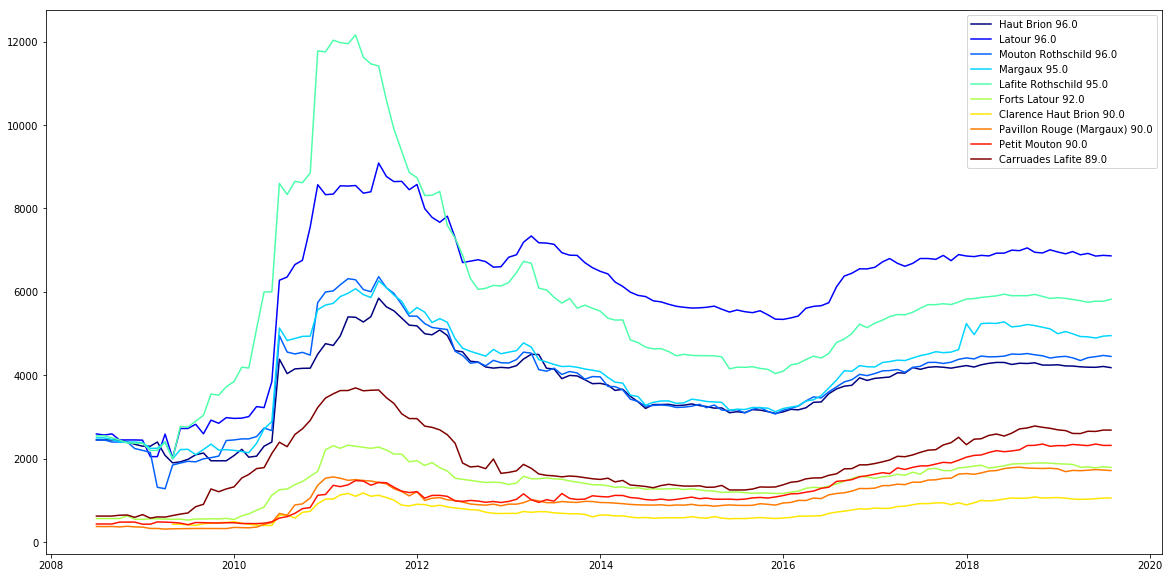

In [36]:
colormap = plt.cm.gist_ncar
fig = plt.figure(figsize=(20,10))
fig.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 10))))
labels = []
for i in (cat_ranking.index):
    plt.plot(wine_avg_prices[i])
    name = i +' ' + str(np.floor(cat_ranking[i]))
    labels.append(name)
plt.legend(labels)

In [41]:
wine_avg_prices.describe()

,Lafite Rothschild,Carruades Lafite,Mouton Rothschild,Petit Mouton,Margaux,Pavillon Rouge (Margaux),Haut Brion,Clarence Haut Brion,Latour,Forts Latour
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,124.000000,134.000000,134.000000
mean,5773.178300,1929.380770,3902.507124,1227.750822,4104.639424,1051.988198,3749.625314,762.826791,6041.042164,1418.661354
std,2312.691168,800.343024,1112.255511,570.510852,1133.041704,443.915847,940.971164,210.798247,1773.443834,477.429514
min,1999.000000,575.000000,1280.000000,417.000000,1999.000000,312.500000,1900.000000,399.000000,2020.000000,528.000000
25%,4447.691964,1353.892857,3225.035714,976.150000,3270.250000,882.424107,3189.522321,587.566964,5570.300000,1208.550000
50%,5645.333333,1762.500000,4094.750000,1088.270833,4283.861111,967.050000,3991.000000,723.694444,6634.133333,1445.766667
75%,6079.000000,2588.875000,4460.975000,1549.527778,4968.845455,1433.637500,4251.875000,940.675000,6932.000000,1784.339286
max,12161.000000,3698.000000,6364.000000,2351.454545,6265.500000,1797.090909,5848.500000,1177.666667,9089.500000,2324.000000


In [43]:
wine_avg_prices.std().sort_values(ascending = False)

Lafite Rothschild           2312.691168
Latour                      1773.443834
Margaux                     1133.041704
Mouton Rothschild           1112.255511
Haut Brion                   940.971164
Carruades Lafite             800.343024
Petit Mouton                 570.510852
Forts Latour                 477.429514
Pavillon Rouge (Margaux)     443.915847
Clarence Haut Brion          210.798247
dtype: float64

In [ ]:
same_vintage = []
vintage_score = []
for i,name in enumerate(wine_table.columns):
    if i == 8 :
        continue
    else:
        price = wine_list[i][2013].dropna()[0]
        score = wine_table.iloc[6][name]
        cat_avg =np.around(cat_ave[name].loc[:'2013-02-28'].describe()['mean'],decimals=2)
        vintage_score.append((name,score,price,cat_avg))
#         same_vintage.append(wine_list[i][2013].dropna()[0])

In [ ]:
wine_table.iloc[6]['Lafite Rothschild']

In [ ]:
m = wine_table ==99
wine_99= wine_table.where(m,0)

In [ ]:
wine_99.sum()

In [ ]:
wine_2014 = wine_list[1][2013].dropna()[0]

In [ ]:
cat_ave['Lafite Rothschild'].loc[:'2013-02-28'].describe()

In [ ]:
vintage_score.sort()
vintage_score

In [ ]:
np.corrcoef([i[2] for i in vintage_score],[i[3] for i in vintage_score])

In [ ]:
plt.scatter([i[1] for i in vintage_score],[i[2] for i in vintage_score])
plt.legend()
plt.show()

In [ ]:
#wine_list[9].describe()[2007] 

In [ ]:
def plot_line_graph(wine):
    wine.plot(figsize=(20,10), linewidth=3, fontsize=20,kind='line')
    plt.xlabel(('Year'+str(wine_name[0])), fontsize=20)
    plt.ylabel('Pounds', fontsize=20)

In [ ]:
def plot_boxchart(wine):
    plt.boxplot(wine)

In [ ]:
plot_boxchart(wine_list[8])

In [19]:
c_2008=pd.concat(cross_wine, axis=1, sort=False).mean(axis=1)


TypeError: cannot concatenate object of type "<class 'list'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [ ]:
plt.plot(temp)

In [ ]:
temp = pd.concat(cross_2, axis=1, sort=False)

In [ ]:
#vintage = 2007

cross_2= []

for year in range(2007,2018):
    cross_1 =[]
    for i in range(10):
        sheet = wine_list[i]
        cross_1.append(sheet[year])
    
    cross_2.append(pd.concat(cross_1, axis=1, sort=False).mean(axis=1))



In [27]:
cat_ave = pd.concat(cross_wine, axis=1, sort=False)

TypeError: cannot concatenate object of type "<class 'list'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [ ]:
cat_ave.set_axis(wine_name[:10], axis=1, inplace=True)

In [ ]:
cat_ave.head()

In [ ]:
cat_ave.info()

In [ ]:
plt.plot(cat_ave.mean(axis=1))

In [ ]:
wine_list[0][2008].loc[:'2013-02-28']

In [ ]:
def get_rank(wine):
    for vintage in wine.columns:
        copy = wine[vintage].copy()
        print(vintage)
        print(copy.nlargest(5))

In [ ]:
get_rank(wine_list[4])

In [ ]:
wine_list[4].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=False)

In [ ]:
def plot_cross_corr(wine):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.xcorr(wine[2007].loc['2009-04-30':], wine[2008].loc['2009-04-30':], usevlines=False, maxlags=10, normed=True)

In [ ]:
def plot_check_graph():
    plt.plot(wine[2017])
    plt.plot(wine[2013])
    plt.show()

In [ ]:
def plot_corr(wine):
    corr = wine.corr()
    ax = sns.heatmap(corr,cmap='YlGnBu',annot=True)
    ax.invert_yaxis()

In [ ]:
plot_corr(wine_list[6])

In [ ]:
def plot_diff(wine):
#first-order differences; removing the trend may reveal correlation in seasonality.
    wine.diff().plot(figsize=(8,5), linewidth=2, fontsize=20)

In [ ]:
plot_diff(cat_ave.mean(axis=1))

In [ ]:
wine.diff().corr()

Autocorrelation
Auto-correlation is the comparison of a time series with itself at a different time. It aims, for example, to detect repeating patterns or seasonality. For example: “Is there weekly seasonality on a server website?”
Cross-correlation is the comparison of two different time series to detect if there is a correlation between metrics with the same maximum and minimum values.For example: “Are two audio signals in phase?”
shitf by time 



In [ ]:
#So, this means that if the original time series repeats itself every two days, you would expect to see a spike in the autocorrelation function at 2 days.
#how correlated the time series is with itself at that lag

In [ ]:
fig1 = pd.plotting.autocorrelation_plot(wine[2007])

In [ ]:
fig2 = pd.plotting.autocorrelation_plot(wine[2008].loc['2009-04-30':])

In [ ]:
fig3 = pd.plotting.autocorrelation_plot(wine[2009].loc['2010-06-30':])

In [ ]:
pd.plotting.autocorrelation_plot(wine[2010].loc['2011-07-31':])

In [ ]:
release_date

In [ ]:
wine.rolling(12).mean().plot(figsize=(8,5), linewidth=5, fontsize=20)

resource = https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

In [ ]:
# assumption here: doesn't matter of vintage 
#we expect new launched wine have same path 
# by checking on data, wrong assumption 


In [ ]:
#normalize cross correlation
a = wine[2008].loc['2009-04-30':]
b = wine[2007].loc['2009-04-30':]
a = (a - np.mean(a)) / (np.std(a) * len(a))
b = (b - np.mean(b)) / (np.std(b))
c = np.correlate(a, b, 'full')

In [ ]:
len(c)

In [ ]:

temp = pd.DataFrame({'2017':wine[2017].loc['2018-06-30':],'2018':wine[2016].loc['2018-06-30':]})

In [ ]:
temp.corr()

In [ ]:
temp.plot()

In [ ]:
temp.rolling(6).mean()['2018-11-30':].corr()


In [ ]:
temp.rolling(6).mean()['2018-11-30':].plot()

In [ ]:

fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)

#ax.plot(wine[2007], marker='o', linestyle='-')
ax.plot(wine, linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Format x-tick labels as 3-letter month name and day number

ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'));